In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import csv
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS


/tmp/ipython-input-1907337387.py:23: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#TEO_path
path_1102 = "/content/drive/MyDrive/Colab_Notebooks/PI-p/Dataset_NASA/1102"
path_1066 = "/content/drive/MyDrive/Colab_Notebooks/PI-p/Dataset_NASA/1066"
txt_path = "/content/drive/MyDrive/Colab_Notebooks/PI-p/Dataset_NASA"
Main_Path_1102 = Path(path_1102)
Main_Path_1066 = Path(path_1066)
#txt_path
Txt_Path = Path(txt_path)
print(Main_Path_1102)
print(Main_Path_1066)
print(Txt_Path)

/content/drive/MyDrive/Colab_Notebooks/PI-p/Dataset_NASA/1102
/content/drive/MyDrive/Colab_Notebooks/PI-p/Dataset_NASA/1066
/content/drive/MyDrive/Colab_Notebooks/PI-p/Dataset_NASA


In [ ]:
print(os.listdir(Main_Path_1102))
print(len(os.listdir(Main_Path_1102)))
print(os.listdir(Main_Path_1066))
print(len(os.listdir(Main_Path_1066)))


['1102_hmi.M_720s.20100830_002400_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_001200_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_000000_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_004800_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_003600_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_020000_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_012400_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_014800_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_013600_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_011200_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_021200_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_010000_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_023600_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_030000_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_031200_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.20100830_040000_TAI.1.magnetogram_224.png', '1102_hmi.M_720s.201008

In [ ]:
filepath_1066 = pd.Series(list(Main_Path_1066.glob(r'**/*.png')), name='filepaths')
filepath_1066[0]
filepath_1102 = pd.Series(list(Main_Path_1102.glob(r'**/*.png')), name='filepaths')
filepath_1102[0]

PosixPath('/content/drive/MyDrive/Colab_Notebooks/PI-p/Dataset_NASA/1102/1102_hmi.M_720s.20100830_002400_TAI.1.magnetogram_224.png')

In [ ]:
text = pd.Series(list(Txt_Path.glob(r'**/*.txt')), name='filepaths')
text[0]

PosixPath('/content/drive/MyDrive/Colab_Notebooks/PI-p/Dataset_NASA/eventList.txt')

In [ ]:
#read txt as csv
df_events = pd.read_csv(text[0], header=None)
df_events

,0,1,2,3,4
0,2010 04 30,21,1064,B1.8,NaN
1,2010 04 30,1934,1067,C2.2,NaN
2,2010 05 01,139,1067,C5.7,NaN
3,2010 05 01,527,1064,B1.6,NaN
4,2010 05 01,952,1067,B1.0,NaN
...,...,...,...,...,...
11741,2017 12 22,1140,2692,B3.0,NaN
11742,2017 12 23,629,2692,B3.3,NaN
11743,2017 12 23,2036,2692,B1.0,NaN
11744,2017 12 25,716,2692,B1.6,NaN


#Preprocessing data
Obtain the time before eruption from the diference between photo_time and eruption_time

In [ ]:
df_events['eruption_datetime_str'] = df_events[0].astype(str) + ' ' + df_events[1].astype(str).str.zfill(4)

#convert the combined string to datetime objects
df_events['eruption_time'] = pd.to_datetime(df_events['eruption_datetime_str'], format='%Y %m %d %H%M', errors='coerce')

df_events[['eruption_datetime_str', 'eruption_time']].head()

,eruption_datetime_str,eruption_time
0,2010 04 30 0021,2010-04-30 00:21:00
1,2010 04 30 1934,2010-04-30 19:34:00
2,2010 05 01 0139,2010-05-01 01:39:00
3,2010 05 01 0527,2010-05-01 05:27:00
4,2010 05 01 0952,2010-05-01 09:52:00


1066 ZONE preprocesed data

In [ ]:

import re
filepath = filepath_1066
def extract_info_from_filepath(filepath):
    filepath_str = str(filepath)

    #extract code from the parent directory name
    parts = filepath_str.split(os.sep)
    photo_code = parts[-2]

    #extract datetime from filename
    filename = str(filepath.name)
    match = re.search(r'(\d{8})_(\d{6})', filename)
    photo_time = pd.NaT
    if match:
        date_str = match.group(1)
        time_str = match.group(2)
        photo_time = pd.to_datetime(f'{date_str} {time_str}', format='%Y%m%d %H%M%S', errors='coerce')

    return photo_code, photo_time

df_photos_1066 = pd.DataFrame({'filepath': filepath})

df_photos_1066['photo_code'] = df_photos_1066['filepath'].apply(lambda x: extract_info_from_filepath(x)[0])
df_photos_1066['photo_time'] = df_photos_1066['filepath'].apply(lambda x: extract_info_from_filepath(x)[1])

df_photos_1066['photo_date'] = df_photos_1066['photo_time'].dt.normalize()
df_events['eruption_date'] = df_events['eruption_time'].dt.normalize()

df_events = df_events.rename(columns={2: 'eruption_code'})
df_events['eruption_code'] = df_events['eruption_code'].astype(str)


#merging the two dataframes using iner merge
merged_df_1066 = pd.merge(
    df_photos_1066,
    df_events,
    left_on=['photo_date', 'photo_code'],
    right_on=['eruption_date', 'eruption_code'],
    how='inner'
)

#calculate the time difference
merged_df_1066['time_difference'] = merged_df_1066['eruption_time'] - merged_df_1066['photo_time']

#display merged_df_1066
merged_df_1066[['filepath', 'photo_code', 'photo_time', 'eruption_code', 'eruption_time', 'time_difference']]

,filepath,photo_code,photo_time,eruption_code,eruption_time,time_difference
0,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 00:00:00,1066,2010-05-03 21:53:00,0 days 21:53:00
1,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 00:12:00,1066,2010-05-03 21:53:00,0 days 21:41:00
2,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 01:24:00,1066,2010-05-03 21:53:00,0 days 20:29:00
3,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 01:36:00,1066,2010-05-03 21:53:00,0 days 20:17:00
4,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 00:36:00,1066,2010-05-03 21:53:00,0 days 21:17:00
...,...,...,...,...,...,...
235,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-05 22:00:00,1066,2010-05-05 16:18:00,-1 days +18:18:00
236,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-05 22:36:00,1066,2010-05-05 16:18:00,-1 days +17:42:00
237,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-05 23:00:00,1066,2010-05-05 16:18:00,-1 days +17:18:00
238,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-05 22:24:00,1066,2010-05-05 16:18:00,-1 days +17:54:00


In [ ]:
#keep only the photos that are in 24h margin
filtered_df_1066 = merged_df_1066[merged_df_1066['time_difference'].dt.days == 0]
filtered_df_1066[['filepath', 'photo_code', 'photo_time', 'eruption_code', 'eruption_time', 'time_difference']]

,filepath,photo_code,photo_time,eruption_code,eruption_time,time_difference
0,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 00:00:00,1066,2010-05-03 21:53:00,0 days 21:53:00
1,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 00:12:00,1066,2010-05-03 21:53:00,0 days 21:41:00
2,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 01:24:00,1066,2010-05-03 21:53:00,0 days 20:29:00
3,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 01:36:00,1066,2010-05-03 21:53:00,0 days 20:17:00
4,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-03 00:36:00,1066,2010-05-03 21:53:00,0 days 21:17:00
...,...,...,...,...,...,...
198,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-05 15:12:00,1066,2010-05-05 16:18:00,0 days 01:06:00
199,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-05 16:00:00,1066,2010-05-05 16:18:00,0 days 00:18:00
200,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-05 15:00:00,1066,2010-05-05 16:18:00,0 days 01:18:00
201,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1066,2010-05-05 15:36:00,1066,2010-05-05 16:18:00,0 days 00:42:00


1102 ZONE preprocesed data

In [ ]:
import re

filepath = filepath_1102
def extract_info_from_filepath(filepath):
    filepath_str = str(filepath)

    #extract code from the parent directory name
    parts = filepath_str.split(os.sep)
    photo_code = parts[-2]

    #extract datetime from filename
    filename = str(filepath.name)
    match = re.search(r'(\d{8})_(\d{6})', filename)
    photo_time = pd.NaT
    if match:
        date_str = match.group(1)
        time_str = match.group(2)
        photo_time = pd.to_datetime(f'{date_str} {time_str}', format='%Y%m%d %H%M%S', errors='coerce')

    return photo_code, photo_time

df_photos_1102 = pd.DataFrame({'filepath': filepath})

df_photos_1102['photo_code'] = df_photos_1102['filepath'].apply(lambda x: extract_info_from_filepath(x)[0])
df_photos_1102['photo_time'] = df_photos_1102['filepath'].apply(lambda x: extract_info_from_filepath(x)[1])

df_photos_1102['photo_date'] = df_photos_1102['photo_time'].dt.normalize()
df_events['eruption_date'] = df_events['eruption_time'].dt.normalize()

df_events = df_events.rename(columns={2: 'eruption_code'})
df_events['eruption_code'] = df_events['eruption_code'].astype(str)

#merging the two dataframes using iner merge
merged_df_1102 = pd.merge(
    df_photos_1102,
    df_events,
    left_on=['photo_date', 'photo_code'],
    right_on=['eruption_date', 'eruption_code'],
    how='inner'
)

# Calculate the time difference
merged_df_1102['time_difference'] = merged_df_1102['eruption_time'] - merged_df_1102['photo_time']

#display merged_df_1102
merged_df_1102[['filepath', 'photo_code', 'photo_time', 'eruption_code', 'eruption_time', 'time_difference']]

,filepath,photo_code,photo_time,eruption_code,eruption_time,time_difference
0,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:24:00,1102,2010-08-30 15:22:00,0 days 14:58:00
1,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:12:00,1102,2010-08-30 15:22:00,0 days 15:10:00
2,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:00:00,1102,2010-08-30 15:22:00,0 days 15:22:00
3,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:48:00,1102,2010-08-30 15:22:00,0 days 14:34:00
4,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:36:00,1102,2010-08-30 15:22:00,0 days 14:46:00
...,...,...,...,...,...,...
349,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-31 23:24:00,1102,2010-08-31 22:47:00,-1 days +23:23:00
350,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-31 23:12:00,1102,2010-08-31 21:53:00,-1 days +22:41:00
351,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-31 23:12:00,1102,2010-08-31 22:47:00,-1 days +23:35:00
352,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-31 23:00:00,1102,2010-08-31 21:53:00,-1 days +22:53:00


In [ ]:
#keep only the photos that are in 24h margin
filtered_df_1102 = merged_df_1102[merged_df_1102['time_difference'].dt.days == 0]
filtered_df_1102[['filepath', 'photo_code', 'photo_time', 'eruption_code', 'eruption_time', 'time_difference']]

,filepath,photo_code,photo_time,eruption_code,eruption_time,time_difference
0,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:24:00,1102,2010-08-30 15:22:00,0 days 14:58:00
1,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:12:00,1102,2010-08-30 15:22:00,0 days 15:10:00
2,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:00:00,1102,2010-08-30 15:22:00,0 days 15:22:00
3,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:48:00,1102,2010-08-30 15:22:00,0 days 14:34:00
4,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-30 00:36:00,1102,2010-08-30 15:22:00,0 days 14:46:00
...,...,...,...,...,...,...
335,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-31 22:00:00,1102,2010-08-31 22:47:00,0 days 00:47:00
337,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-31 22:36:00,1102,2010-08-31 22:47:00,0 days 00:11:00
339,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-31 22:24:00,1102,2010-08-31 22:47:00,0 days 00:23:00
340,/content/drive/MyDrive/Colab_Notebooks/PI-p/Da...,1102,2010-08-31 21:00:00,1102,2010-08-31 21:53:00,0 days 00:53:00


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import StandardScaler
filtered_df = filtered_df_1066

raw_images = []
for filepath in filtered_df['filepath']:
    #loading the image 224x224
    img = image.load_img(filepath, target_size=(224, 224))
    img_array = image.img_to_array(img)
    raw_images.append(img_array)

X_raw = np.array(raw_images)

X_final = preprocess_input(X_raw)

#scale y
y = filtered_df['time_difference'].dt.total_seconds()
scaler_y = StandardScaler() # Folosim StandardScaler pentru y (mult mai sigur pentru regresie decât MinMax)
y_final = scaler_y.fit_transform(y.values.reshape(-1, 1))

#split data
X_train, X_val, y_train, y_val = train_test_split(
    X_final,
    y_final,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print(f"Date pregătite: X_train shape: {X_train.shape}, y_train min/max: {y_train.min():.2f}/{y_train.max():.2f}")

Date pregătite: X_train shape: (153, 224, 224, 3), y_train min/max: -1.65/2.06


#Training VGG16 model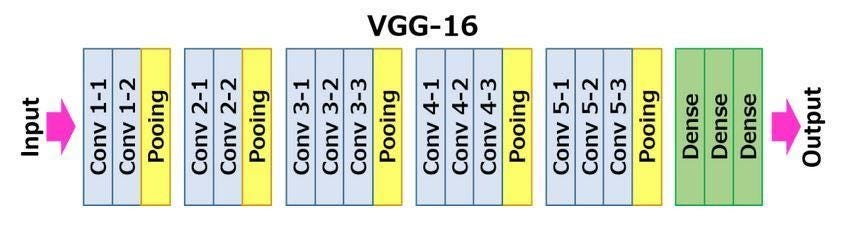

In [ ]:

#loading the VGG model pretrained with ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  #freezing the VGG

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='linear') #activation for linear regresion
])

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mae', metrics=['mse'])#MAE for testing

#training only the head of VGG
print("Start Antrenament...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

#visualize the results
y_pred_scaled = model.predict(X_val)

# Revenim la scara reală (secunde)
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
y_val_real = scaler_y.inverse_transform(y_val)

r2 = r2_score(y_val_real, y_pred_real)
mse = mean_squared_error(y_val_real, y_pred_real)

print(f"R2 Score: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_val_real, y_pred_real, color='blue', alpha=0.5, label='Predicții')
plt.plot([y_val_real.min(), y_val_real.max()], [y_val_real.min(), y_val_real.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Secunde Reale')
plt.ylabel('Secunde Prezise')
plt.title(f'Rezultat Final (R2={r2:.2f})')
plt.legend()
plt.show()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Start Antrenament...
Epoch 1/15


KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

base_model.trainable = True

for layer in base_model.layers:
    # unfreeze block4 & block5
    if 'block4' in layer.name or 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

print("Am deblocat Block 4 și Block 5 pentru a învăța texturile fine.")

optimizer = Adam(learning_rate=1e-5)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

checkpoint = ModelCheckpoint(
    'best_volcano_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Dacă loss-ul nu scade timp de 3 epoci, reducem rata de învățare și mai mult
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Antrenament Lung 50 epoci
print("Începe Fine-Tuning...")
history_final = model.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    steps_per_epoch=len(X_train) // 16,
    validation_data=(X_val, y_val),
    epochs=50, # Dăm timp (50 epoci)
    callbacks=[checkpoint, reduce_lr],
    verbose=1
)

Am deblocat Block 4 și Block 5 pentru a învăța texturile fine.
Începe Fine-Tuning extins...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.7579 - mae: 0.7267 - mse: 0.7579
Epoch 1: val_loss improved from inf to 0.76345, saving model to best_volcano_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - loss: 0.7444 - mae: 0.7197 - mse: 0.7444 - val_loss: 0.7635 - val_mae: 0.7113 - val_mse: 0.7635 - learning_rate: 1.0000e-05
Epoch 2/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - loss: 0.3841 - mae: 0.4318 - mse: 0.3841

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.76345 to 0.75769, saving model to best_volcano_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.3841 - mae: 0.4318 - mse: 0.3841 - val_loss: 0.7577 - val_mae: 0.7074 - val_mse: 0.7577 - learning_rate: 1.0000e-05
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 0.3350 - mae: 0.4585 - mse: 0.3350
Epoch 3: val_loss improved from 0.75769 to 0.68590, saving model to best_volcano_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - loss: 0.3364 - mae: 0.4588 - mse: 0.3364 - val_loss: 0.6859 - val_mae: 0.6717 - val_mse: 0.6859 - learning_rate: 1.0000e-05
Epoch 4/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.4568 - mae: 0.5634 - mse: 0.4568
Epoch 4: val_loss improved from 0.68590 to 0.67896, saving model to best_volcano_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 703ms/step - loss: 0.4568 - mae: 0.5634 - mse: 0.4568 - val_loss: 0.6790 - val_mae: 0.6693 - val_mse: 0.6790 - learning_rate: 1.0000e-05
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
R2 Score: 0.8903


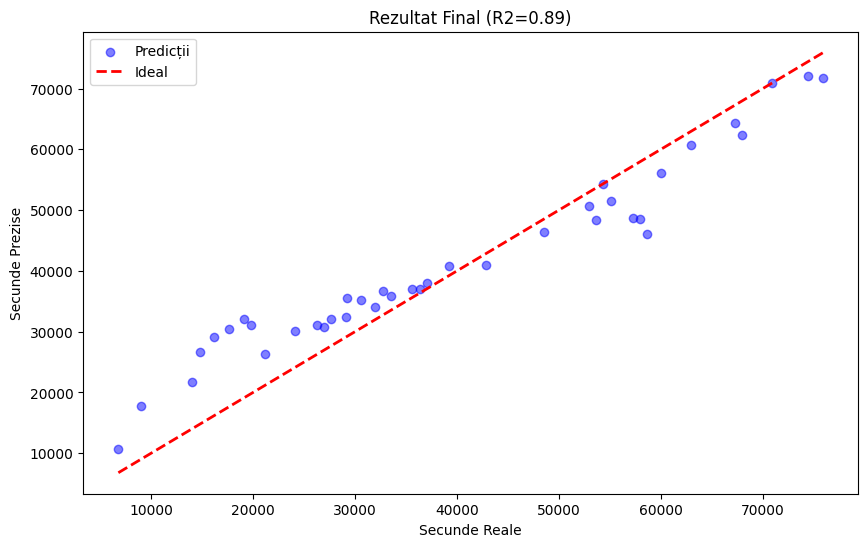

In [ ]:
y_pred_scaled = model.predict(X_val)

# Revenim la scara reală (secunde)
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
y_val_real = scaler_y.inverse_transform(y_val)

r2 = r2_score(y_val_real, y_pred_real)
mse = mean_squared_error(y_val_real, y_pred_real)

print(f"R2 Score: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_val_real, y_pred_real, color='blue', alpha=0.5, label='Predicții')
plt.plot([y_val_real.min(), y_val_real.max()], [y_val_real.min(), y_val_real.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Secunde Reale')
plt.ylabel('Secunde Prezise')
plt.title(f'Rezultat Final (R2={r2:.2f})')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 12s/step
R2 Score: 0.9751


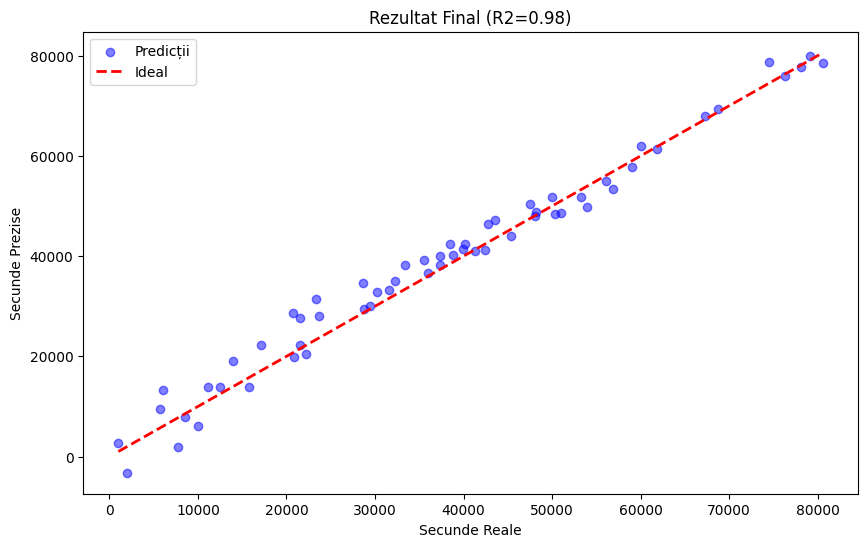

In [ ]:
#1102 prediction
y_pred_scaled = loaded_model_1102.predict(X_val)

# Revenim la scara reală (secunde)
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
y_val_real = scaler_y.inverse_transform(y_val)

r2 = r2_score(y_val_real, y_pred_real)
mse = mean_squared_error(y_val_real, y_pred_real)

print(f"R2 Score: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_val_real, y_pred_real, color='blue', alpha=0.5, label='Predicții')
plt.plot([y_val_real.min(), y_val_real.max()], [y_val_real.min(), y_val_real.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Secunde Reale')
plt.ylabel('Secunde Prezise')
plt.title(f'Rezultat Final (R2={r2:.2f})')
plt.legend()
plt.show()

In [ ]:
#saving model
#save_path = '/content/drive/MyDrive/Colab_Notebooks/PI-p/Teo_VGG_V2_1066_v2.keras'
#model.save(save_path)

Using the saved model and predicting

In [ ]:
#load the saved models
save_path_1102 = '/content/drive/MyDrive/Colab_Notebooks/PI-p/Teo_VGG_V2_1102.keras'
save_path_1066 = '/content/drive/MyDrive/Colab_Notebooks/PI-p/Teo_VGG_V2_1066_v2.keras'

loaded_model_1102 = tf.keras.models.load_model(save_path_1102)
loaded_model_1066 = tf.keras.models.load_model(save_path_1066)

print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
#using an image example
sample_image_path = filtered_df_1066['filepath'].iloc[17]

#loading an image
img = image.load_img(sample_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

#preprocessing
processed_img = preprocess_input(img_array)

print(f"Sample image shape after preprocessing: {processed_img.shape}")

Sample image shape after preprocessing: (1, 224, 224, 3)


In [ ]:
#make a prediction
scaled_prediction = loaded_model_1066.predict(processed_img)

#inverse transform the prediction to get the real time in seconds
real_prediction = scaler_y.inverse_transform(scaled_prediction)

print(f"Predicted time before eruption(in seconds): {real_prediction[0][0]:.0f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted time before eruption(in seconds): 72306


This `real_prediction` value is the model's estimate of the time difference in seconds for the input image you provided. You can repeat this process for any new images you want to analyze.

In [ ]:
#get the actual time difference for the sample image
actual_time_difference_series = filtered_df_1066[filtered_df_1066['filepath'] == sample_image_path]['time_difference'].dt.total_seconds()

if not actual_time_difference_series.empty:
    actual_time_difference = actual_time_difference_series.iloc[0]
    print(f"Actual time before eruption for the sample image: {actual_time_difference:.0f}")
    print(f"Predicted time before eruption for the sample image: {real_prediction[0][0]:.0f}")
else:
    print("Could not find the image")

Actual time before eruption for the sample image: 69420
Predicted time before eruption for the sample image: 72306


## Testing the 2 zones

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
R2 Score for loaded_model_1066: 0.8903
MSE for loaded_model_1066: 41193259 seconds
RMSE for loaded_model_1066: 6418 seconds


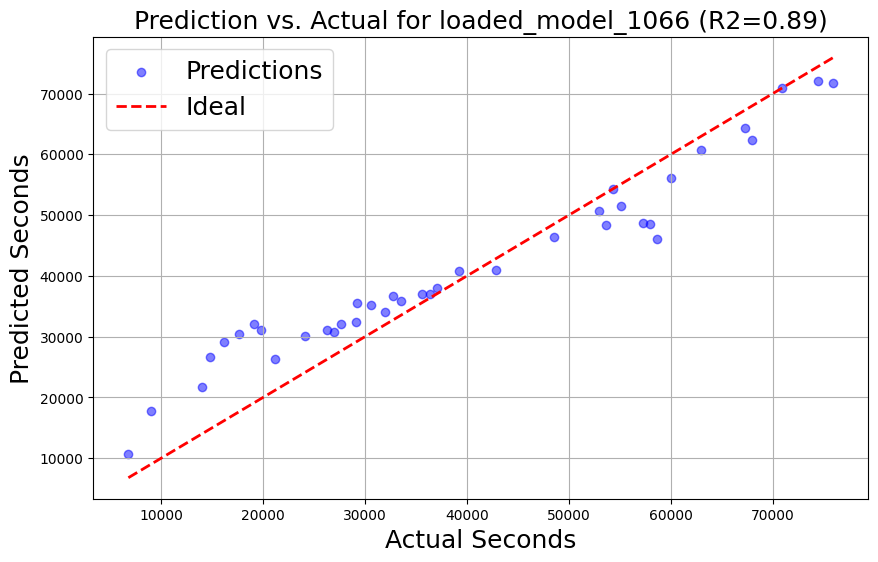

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
#using 1066
filtered_df = filtered_df_1066

#preprocessed image
raw_images = []
for filepath in filtered_df['filepath']:
    img = image.load_img(filepath, target_size=(224, 224))
    img_array = image.img_to_array(img)
    raw_images.append(img_array)
X_raw = np.array(raw_images)
X_final = preprocess_input(X_raw)

y = filtered_df['time_difference'].dt.total_seconds()
scaler_y = StandardScaler() # Re-initialize scaler for 1066 data
y_final = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data into training and validation
_, X_val, _, y_val = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, shuffle=True
)

y_pred_scaled = loaded_model_1066.predict(X_val)

y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
y_val_real = scaler_y.inverse_transform(y_val)

r2 = r2_score(y_val_real, y_pred_real)
mse = mean_squared_error(y_val_real, y_pred_real)
rmse = np.sqrt(mse)

print(f"R2 Score for loaded_model_1066: {r2:.4f}")
print(f"MSE for loaded_model_1066: {mse:.0f} seconds")
print(f"RMSE for loaded_model_1066: {rmse:.0f} seconds")

#plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_val_real, y_pred_real, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_val_real.min(), y_val_real.max()], [y_val_real.min(), y_val_real.max()], 'r--', lw=2, label='Ideal')

plt.xlabel('Actual Seconds',fontsize = 18)
plt.ylabel('Predicted Seconds',fontsize = 18)
plt.title(f'Prediction vs. Actual for loaded_model_1066 (R2={r2:.2f})',fontsize = 18)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
R2 Score for loaded_model_1102: 0.9751
MSE for loaded_model_1102: 10825981 seconds
RMSE for loaded_model_1102: 3290 seconds


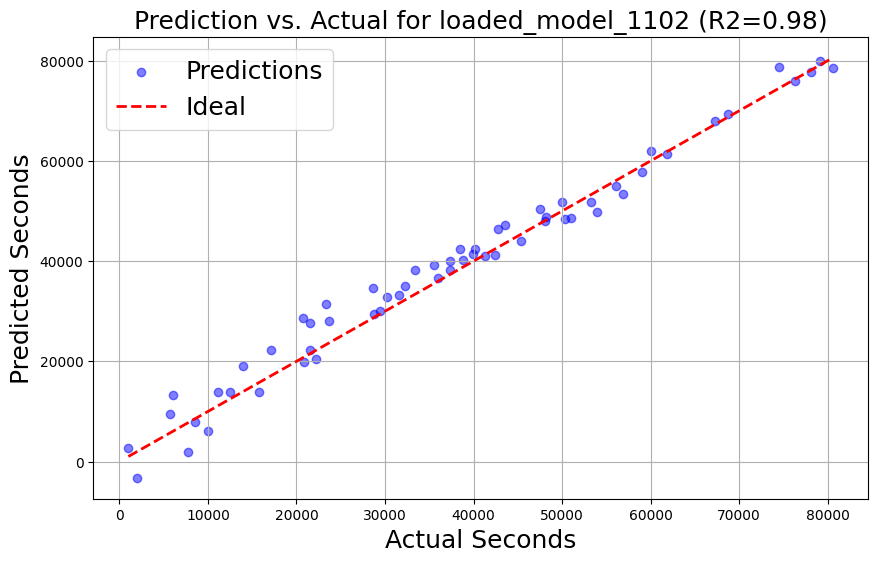

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

filtered_df = filtered_df_1102

#preprocesed for 1102 zone
raw_images = []
for filepath in filtered_df['filepath']:
    img = image.load_img(filepath, target_size=(224, 224))
    img_array = image.img_to_array(img)
    raw_images.append(img_array)
X_raw = np.array(raw_images)
X_final = preprocess_input(X_raw)

# Re-scale y
y = filtered_df['time_difference'].dt.total_seconds()
scaler_y = StandardScaler() #standard scaler
y_final = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data into training and validation sets for 1102 data
_, X_val, _, y_val = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, shuffle=True
)

y_pred_scaled = loaded_model_1102.predict(X_val)

y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
y_val_real = scaler_y.inverse_transform(y_val)

r2 = r2_score(y_val_real, y_pred_real)
mse = mean_squared_error(y_val_real, y_pred_real)
rmse = np.sqrt(mse)

print(f"R2 Score for loaded_model_1102: {r2:.4f}")
print(f"MSE for loaded_model_1102: {mse:.0f} seconds")
print(f"RMSE for loaded_model_1102: {rmse:.0f} seconds")

plt.figure(figsize=(10, 6))
plt.scatter(y_val_real, y_pred_real, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_val_real.min(), y_val_real.max()], [y_val_real.min(), y_val_real.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Seconds',fontsize = 18)
plt.ylabel('Predicted Seconds',fontsize = 18)
plt.title(f'Prediction vs. Actual for loaded_model_1102 (R2={r2:.2f})',fontsize = 18)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()
